In [1]:
from matplotlib import pyplot as plt
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import random
from scipy.stats import ks_2samp
from utils import ( 
                    numerical_data_distribution_plot,
                    create_drift_metric_comparison_table_numerical,
                    create_bin_strategy_comparison_table_numerical,
                    create_comparison_with_evidently_table_numerical,
                    create_sample_size_comparison_table_numerical,
                    create_sample_size_bin_comparison_table_numerical,
             )
from yaml import safe_load
config = safe_load(open('config.yml','rb'))

In [14]:
observations = 9_000
distribution_selection = '1b'

In [19]:
print(f'Observations: {observations}')
print(f'Distribution Selection: {distribution_selection}')

if distribution_selection == '1a':
    description = 'Identical Normal Distributions - No Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = x

elif distribution_selection == '1b':
    description = 'Normal Distributions - Minimal Drift'
    x = np.random.normal(50, 0, observations) # reference
    y = np.random.normal(51, 0, observations) # small drift 

elif distribution_selection == '1c':
    description = 'Normal Distributions - Small Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.random.normal(53, 15, int(observations*0.1)) # small drift 

elif distribution_selection == '1d':
    description = 'Normal Distributions - Large Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.random.normal(60, 20, observations) # small drift 

elif distribution_selection == '1e':
    description = 'Normal Distributions - Very Large Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.random.normal(200, 15, observations) # small drift 

elif distribution_selection == '1f':
    description = 'Normal Distributions - Extreme Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.random.normal(100, 15, observations) # small drift 

elif distribution_selection == '1g':
    description = 'Normal Distributions - No Drift - Different Scale'
    x = np.random.normal(50000, 1500, observations) # reference
    y = np.random.normal(50000, 1500, observations) # small drift 

elif distribution_selection == '2a':
    description = 'Normal Distributions with Outliers - Small Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.append(np.random.normal(50, 15, observations),np.random.normal(125,1,int(observations/100))) # same as reference with small amout of outliers

elif distribution_selection == '2b':
    description = 'Normal Distributions with Outliers - Some Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.append(np.random.normal(50, 15, observations),np.random.normal(125,1,int(observations/80))) # same as reference with a some of outliers

elif distribution_selection == '2c':
    description = 'Normal Distributions with Outliers - Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.append(np.random.normal(50, 15, observations),np.random.normal(125,1,int(observations/60))) # same as reference with some outliers

elif distribution_selection == '2d':
    description = 'Normal Distributions with Outliers - Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.append(np.random.normal(50, 15, observations),np.random.normal(125,1,int(observations/40))) # same as reference with some outliers

elif distribution_selection == '3a':
    description = 'Identical Uniform Distributions - No Drift'
    x = np.random.uniform(10,50, observations) # reference
    y = x

elif distribution_selection == '3b':
    description = 'Uniform Distributions with small excess in the upper range - Small Drift'
    x = np.random.uniform(10,50, observations) # reference
    y = np.append(np.random.uniform(10,50, int(observations*0.95)),np.random.uniform(20,50, int(observations*0.05)))  # small drift 

elif distribution_selection == '3c':
    description = 'Uniform Distributions with small excess in the upper range - Some Drift'
    x = np.random.uniform(10,50, observations) # reference
    y = np.append(np.random.uniform(10,50, int(observations*0.7)),np.random.uniform(20,50, int(observations*0.3)))  # some drift 

elif distribution_selection == '3d':
    description = 'Uniform Distributions With Different Range - Drift'
    x = np.random.uniform(10,50, observations) # reference
    y = np.random.uniform(10,60, observations) # reference

elif distribution_selection == '4a':
    description = 'Single Value - No Drift'
    x = np.full(observations,10) # single value
    y = np.full(observations,10) # same single value

elif distribution_selection == '4b':
    description = 'Single Value with some outliers - Drift'
    x = np.full(observations,10) # single value
    y = np.append(np.full(observations,10), np.full(int(observations/50),10.01)) # same single value with some outliers

elif distribution_selection == '4c':
    description = 'Differnt Single Values - Drift'
    x = np.full(observations,10) # single value
    y = np.full(observations,10.01) # single value



Observations: 9000
Distribution Selection: 1b


In [20]:
Markdown('# <strong>{}</strong><br/>'.format(description))

# <strong>Normal Distributions - Minimal Drift</strong><br/>

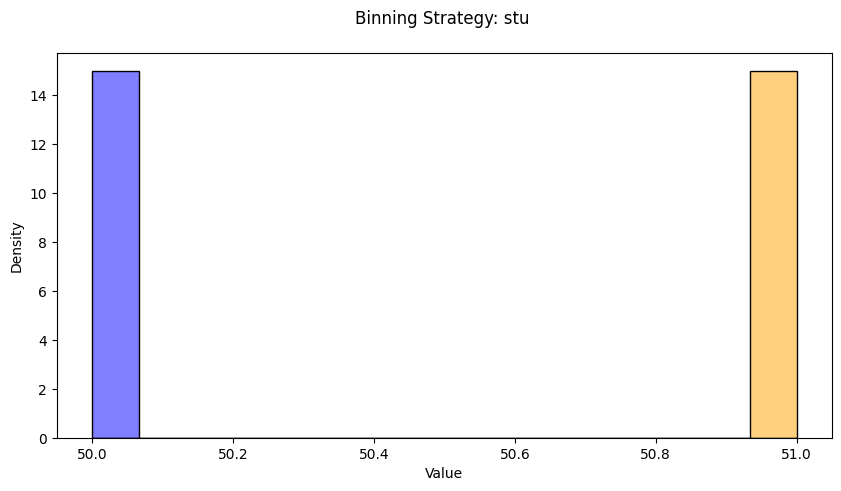

In [21]:
g = numerical_data_distribution_plot(x,y,bin_strategy='stu')

In [22]:
df=create_drift_metric_comparison_table_numerical(x,y)
df

,Distance,Drift Detection
Jensen-Shannon Distance,1.0,drift detected
Normed Wasserstein Distance,1000.0,drift detected
Normed Wasserstein Distance on Prob Dist,0.0,no drift
PSI,18.2102,drift detected
D_inf,1.0,drift detected
KS Test,0.0,drift detected


In [7]:
df = create_bin_strategy_comparison_table_numerical(x,y)
df

,stu,evi,min,max
Number of Bins,18.0000,19.0000,18.0000,18.0000
Jensen-Shannon Distance,1.0000,1.0000,1.0000,1.0000
Normed Wasserstein Distance,1000.0000,1000.0000,1000.0000,1000.0000
PSI,23.0259,23.0259,23.0259,23.0259
D_inf,1.0000,1.0000,1.0000,1.0000
KS Test,0.0000,0.0000,0.0000,0.0000


In [8]:
df = create_comparison_with_evidently_table_numerical(x,y)
df

,Local,Evidently
Jensen-Shannon Distance,1.0000,0.8326
Wasserstein Distance,1000.0000,1000.0000
PSI,18.4188,18.4188


### Test Jensen-Shannon Distance

In [9]:
df = create_sample_size_comparison_table_numerical(x,y,"jensen_shannon_distance_numerical", output='distance')
df

,stu,evi,min,max
Full Sample,1.0,1.0,1.0,1.0
1/10th Sample,1.0,1.0,1.0,1.0
1/100th Sample,1.0,1.0,1.0,1.0
1/1000th Sample,1.0,1.0,1.0,1.0
"1/10,000th Sample",1.0,1.0,1.0,1.0


 ### Test Wasserstein Distance

In [10]:
df = create_sample_size_comparison_table_numerical(x,y,"normed_wasserstein_distance_numerical", output='distance')
df

,stu,evi,min,max
Full Sample,1000.0,1000.0,1000.0,1000.0
1/10th Sample,1000.0,1000.0,1000.0,1000.0
1/100th Sample,1000.0,1000.0,1000.0,1000.0
1/1000th Sample,1000.0,1000.0,1000.0,1000.0
"1/10,000th Sample",1000.0,1000.0,1000.0,1000.0


### Test PSI

In [11]:
df = create_sample_size_comparison_table_numerical(x,y,"psi_numerical", output='distance')
df

,stu,evi,min,max
Full Sample,23.0259,23.0259,23.0259,23.0259
1/10th Sample,20.7263,20.7269,20.7263,20.7269
1/100th Sample,18.4673,18.4992,18.4673,18.4992
1/1000th Sample,16.6112,17.3013,16.6112,17.3013
"1/10,000th Sample",17.6041,29.5764,17.6041,29.5764


### Test D_inf

In [12]:
df = create_sample_size_comparison_table_numerical(x,y,"d_inf_numerical", output='distance')
df

,stu,evi,min,max
Full Sample,1.0,1.0,1.0,1.0
1/10th Sample,1.0,1.0,1.0,1.0
1/100th Sample,1.0,1.0,1.0,1.0
1/1000th Sample,1.0,1.0,1.0,1.0
"1/10,000th Sample",1.0,1.0,1.0,1.0


### Test KS Test

In [13]:
df = create_sample_size_comparison_table_numerical(x,y,"two_sample_ks_test_numerical", output='distance')
df

,stu,evi,min,max
Full Sample,0.0,0.0,0.0,0.0
1/10th Sample,0.0,0.0,0.0,0.0
1/100th Sample,0.0,0.0,0.0,0.0
1/1000th Sample,0.0,0.0,0.0,0.0
"1/10,000th Sample",0.0,0.0,0.0,0.0
